<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



_______________________________________

El primer paso es visualizar nuestras variables categoricas.

In [38]:
import pandas as pd
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

import numpy as np

from category_encoders import TargetEncoder

import sys
import os
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('../'))
from src import soporte_encoding as se
from src import funciones_soporte as fs

In [26]:
df = pd.read_csv("../datos/df_autorenew_nonulls_estand_sinout.csv", index_col=0)
df.reset_index(drop=True, inplace=True)
df.head()

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,price,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,tipo_coche,powerCV_robust,kilometer_robust
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,test,sin informacion,manually,golf,480,sin informacion,petrol,volkswagen,sin informacion,2016-03-24 00:00:00,2016-04-07 03:16:57,Joven Clásico,0.072957,0.0
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,sin informacion,18300,May,diesel,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50,Moderno Clásico,1.098361,-1.0
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,test,suv,automatic,grand,9800,August,diesel,jeep,sin informacion,2016-03-14 00:00:00,2016-04-05 12:47:46,Moderno Clásico,0.672131,-1.0
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,test,small car,manually,golf,1500,June,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17,Moderno Clásico,-0.754098,0.0
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,test,small car,manually,fabia,3600,July,diesel,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21,Moderno Clásico,-0.852459,-2.4


In [27]:
fs.display_value_count(df)

dateCrawled
2016-03-24 14:49:47    7
2016-03-26 22:57:31    6
2016-03-19 21:49:56    6
2016-03-28 10:48:11    5
2016-04-02 21:54:36    5
                      ..
2016-03-07 17:06:35    1
2016-04-01 01:55:58    1
2016-03-08 13:52:00    1
2016-03-31 19:52:33    1
2016-03-26 14:38:18    1
Name: count, Length: 273792, dtype: int64

name
Ford_Fiesta                                               644
BMW_318i                                                  627
Opel_Corsa                                                609
Volkswagen_Golf_1.4                                       603
BMW_316i                                                  523
                                                         ... 
LT_35_DIESEL_Gruene_Plakette....letzte_Gelegenheit          1
Mercedes_benz_e_klasse_avangarde_220_cdi_grune_plakett      1
Seat_Leon_1.9_TDI_4/5_Tueren                                1
turbo_defekt                                                1
Suche_t4___vito_ab_6_sitze                                  1
Name: count, Length: 223870, dtype: int64

seller
private       359181
commercial         3
Name: count, dtype: int64

offerType
offer      359178
request         6
Name: count, dtype: int64

abtest
test       186020
control    173164
Name: count, dtype: int64

vehicleType
sin informacion    127737
small car           78199
combi               66026
bus                 29719
convertible         22120
coupe               17932
suv                 14304
other                3147
Name: count, dtype: int64

gearbox
manually           266752
automatic           74823
sin informacion     17609
Name: count, dtype: int64

model
golf               29071
andere             25362
3er                19977
sin informacion    18061
polo               12650
                   ...  
serie_2                8
rangerover             6
serie_3                3
serie_1                1
discovery_sport        1
Name: count, Length: 252, dtype: int64

price
500      5670
1500     5394
1000     4648
1200     4594
2500     4438
         ... 
5625        1
13049       1
9994        1
4110        1
2425        1
Name: count, Length: 4999, dtype: int64

monthOfRegistration
March              35447
sin informacion    33126
June               32336
April              30211
May                29884
July               28215
October            26743
November           24979
December           24788
September          24555
January            23878
August             23190
February           21832
Name: count, dtype: int64

fuelType
petrol             217162
diesel             105878
sin informacion     29820
lpg                  5233
cng                   560
hybrid                268
other                 171
electro                92
Name: count, dtype: int64

brand
volkswagen        76964
bmw               39021
opel              38729
mercedes_benz     34391
audi              31830
ford              24826
renault           17425
peugeot           10810
fiat               9363
seat               6832
skoda              5575
mazda              5544
smart              5172
citroen            5062
nissan             4901
toyota             4619
hyundai            3592
mini               3357
sonstige_autos     3246
volvo              3236
mitsubishi         2965
honda              2734
kia                2497
suzuki             2275
alfa_romeo         2259
chevrolet          1788
porsche            1576
chrysler           1381
dacia               890
jeep                785
daihatsu            775
subaru              752
land_rover          733
jaguar              581
daewoo              533
saab                519
trabant             499
lancia              468
rover               466
lada                213
Name: count, dtype: int64

notRepairedDamage
no                 258279
sin informacion     66656
yes                 34249
Name: count, dtype: int64

dateCreated
2016-04-03 00:00:00    14011
2016-04-04 00:00:00    13541
2016-03-20 00:00:00    13108
2016-03-12 00:00:00    12966
2016-03-21 00:00:00    12844
                       ...  
2015-12-17 00:00:00        1
2015-11-10 00:00:00        1
2016-01-06 00:00:00        1
2015-09-09 00:00:00        1
2015-06-18 00:00:00        1
Name: count, Length: 113, dtype: int64

lastSeen
2016-04-07 06:45:59    17
2016-04-07 05:44:30    16
2016-04-06 02:45:52    16
2016-04-06 01:16:21    16
2016-04-06 04:17:20    16
                       ..
2016-03-18 11:30:17     1
2016-03-12 12:18:05     1
2016-04-02 18:16:20     1
2016-03-13 01:44:13     1
2016-03-19 20:44:43     1
Name: count, Length: 177841, dtype: int64

tipo_coche
Moderno Clásico    235253
Joven Clásico       94495
Moderno             25681
Clásico              3486
Sin registro          145
Vintage                67
Veterano               57
Name: count, dtype: int64

powerCV_robust
 0.072957    26938
-0.754098    23322
-1.000000    15472
 0.459016    15010
 0.295082    13437
             ...  
 5.377049        1
 7.852459        1
 5.196721        1
 5.688525        1
 7.147541        1
Name: count, Length: 507, dtype: int64

kilometer_robust
 0.0    232924
-1.0     37299
-2.0     15417
-2.4     12292
-2.8     10832
-3.2      9605
-3.6      8490
-4.0      7419
-4.4      6189
-5.8      5845
-4.8      5782
-5.2      5339
-5.6      1751
Name: count, dtype: int64

Vamos a eliminar alguna columnas categoricas que no aportan valor y generan ruido ya que tienen muchísimos valores distintos y no son de gran ayuda para el modelo predictivo y a nosotros no simplican un gran problema a la hora de hacer el encoding.

Eliminaremos: dateCrawled, name, seller, offerType, dateCreated, lastSeen.

In [28]:
df.drop(columns=["dateCrawled", "name", "seller", "offerType", "dateCreated", "lastSeen"], inplace=True)

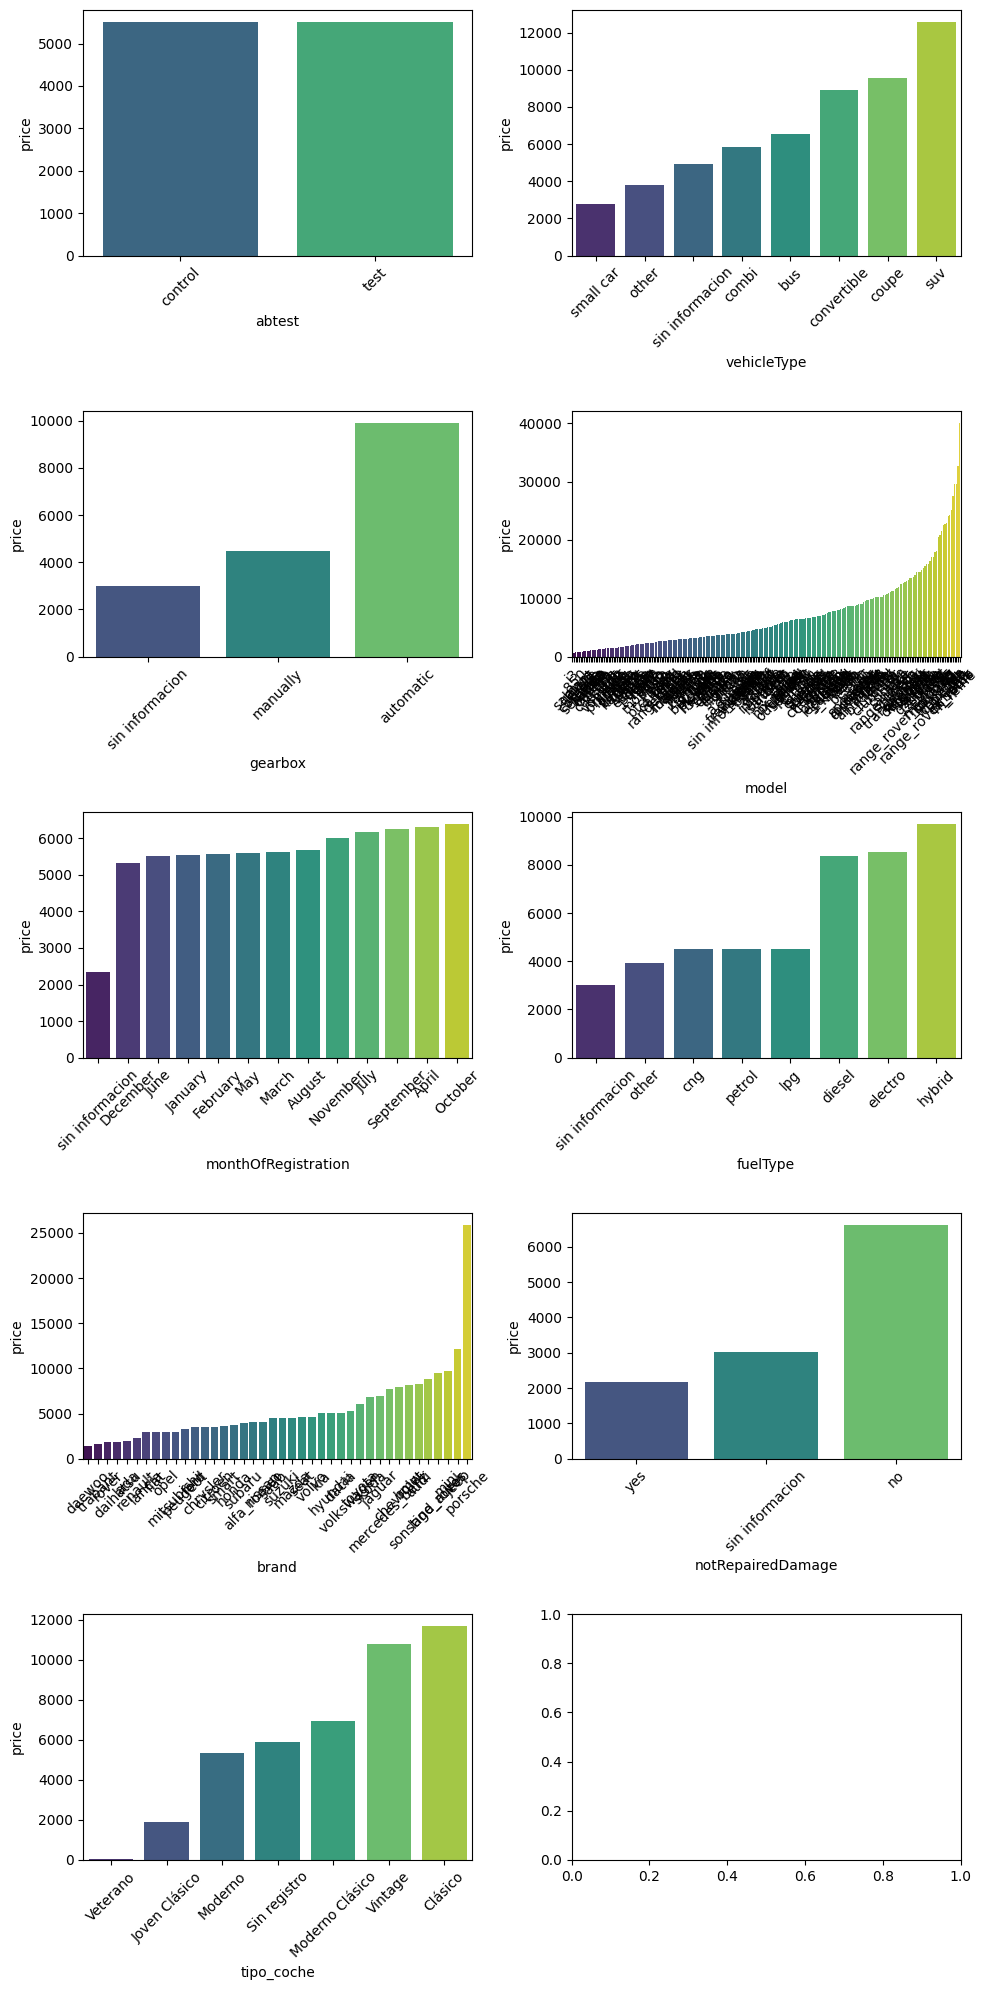

In [29]:
lista_col_categoricas = df.select_dtypes(exclude=np.number).columns
var_respuesta = "price"

analisis = se.Analisis_Visual_Encoding(df.sample(10000), lista_col_categoricas, var_respuesta)
analisis.crear_barplot(tamano_grafica=(10, 20))

In [ ]:
asuncion = se.Asunciones(df, "price")

for col in lista_col_categoricas:
    print(f"Estamos analizando la variable {col.upper()}")
    asuncion.identificar_normalidad(metodo = "kolmogorov") 
    asuncion.identificar_homogeneidad(columna_categorica = col)
    test = se.TestEstadisticos(df, "price", col)
    test.run_all_tests()
    print("\n###########################\n")

Sí hay diferencias significativas en: VEHICLETYPE, GEARBOX, MODEL, MONTHOFREGISTRATION, FUELTYPE, BRAND, NOTREPAIREDDAMAGE, TIPO_COCHE, solo no hay diferencias significativas en ABTEST.

Primero hacemos el encoding del abtest:

In [32]:
diccionario_encoding={"onehot":["abtest"], "target":["vehicleType"]}
var_respuesta = "price"
encoding = se.Encoding(df, diccionario_encoding, var_respuesta)

In [33]:
df["abtest"]=encoding.one_hot_encoding()["abtest_control"]

Ahora procedemos a hacer el encoding del resto de columnas:

In [36]:
df.select_dtypes('O').columns

Index(['vehicleType', 'gearbox', 'model', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'tipo_coche'],
      dtype='object')

In [39]:
columnas_categoricas = df.select_dtypes('O').columns
var_respuesta = "price"

target_encoder = TargetEncoder(cols=columnas_categoricas)
variables_encoded = target_encoder.fit_transform(df, df[var_respuesta])
variables_encoded

,abtest,vehicleType,gearbox,model,price,monthOfRegistration,fuelType,brand,notRepairedDamage,tipo_coche,powerCV_robust,kilometer_robust
0,0.0,5062.437140,4543.454122,4889.463968,480,2361.651361,4577.937890,5278.253534,3129.203298,1866.224985,0.072957,0.0
1,0.0,9199.735501,4543.454122,4081.138863,18300,5772.465968,8422.844151,8688.614703,2178.951561,7030.947287,1.098361,-1.0
2,0.0,12548.975391,9897.289871,8284.186356,9800,5818.812204,8422.844151,10925.109554,3129.203298,7030.947287,0.672131,-1.0
3,0.0,2790.574777,4543.454122,4889.463968,1500,5884.419038,4577.937890,5278.253534,6662.250996,7030.947287,-0.754098,0.0
4,0.0,2790.574777,4543.454122,4224.542233,3600,6183.136948,8422.844151,6461.073722,6662.250996,7030.947287,-0.852459,-2.4
...,...,...,...,...,...,...,...,...,...,...,...,...
359179,0.0,5062.437140,2919.315009,4081.138863,2200,5979.542382,2933.153823,8953.519100,3129.203298,7030.947287,0.152342,-5.2
359180,0.0,9174.154837,9897.289871,3631.073557,1199,5770.775609,4577.937890,3545.469838,6662.250996,7030.947287,-0.327869,-1.0
359181,0.0,6628.733739,4543.454122,9869.882419,9200,5770.775609,8422.844151,5278.253534,6662.250996,1866.224985,-0.311475,0.0
359182,0.0,5773.536380,4543.454122,4889.463968,3400,5884.419038,8422.844151,5278.253534,3129.203298,7030.947287,-0.344262,0.0


In [40]:
variables_encoded.to_csv("../datos/df_autorenew_nonulls_estand_sinout_encoded.csv")